<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 10
### Applied Machine Learning



In [44]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import ipaddress
import os 

In [45]:
pd.__version__ ## new pandas package needs to set chained_assignment = None

'1.0.3'

__1. [10 pts] Download the labeled dataset, if you like use a dummy email address for
registration. There must be 8 data files, each representing a particular cyber-attack type
and it's day, and it's collected pcap data.__


__2. [10 pts] Pick one of the data files, call it Dataset 1, and examine its features. Make sure it
has more than one class value for its label.__

In [3]:
df = pd.read_csv("GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [4]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
print(len(df.columns))
df.columns

85


Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [6]:
df.columns = df.columns.str.lstrip()

__3. [10 pts] For the Dataset 1, pick a machine learning methodology and justify your choice.__

As I am forecasting into question 6 which respect to keeping columns that cotnain information about bytes, packets, and duration which doesn't really leave many of the 85 columns out, I will want to try different ensemble methods for the supervised datasets including RandomForestClassifier, GradientBoostingClassifier, and Voting Classifier that will vote based on mix of Bayesian and DNN.  For the dataset with only a single class I will use K-means and DBSCAN.

__4. [10 pts] Process the class feature/category as binary classes for supervised learning,
assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1.__

In [7]:
df.Label = np.where(df.Label == 'BENIGN', 0, 1)
df.Label.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int32

In [8]:
np.unique(df.Label, return_counts=True)[1]/len(df.Label)

array([0.43286895, 0.56713105])

__5. [10 pts] Explore Dataset 1 features with respect to the class. (Hint: features port1 and
port2 are very useful, research and find out important networking port numbers and onehot-encode them. Unimportant port numbers or source port numbers can be assigned to a
feature called 'other ports')__

Looking at the ports first...

In [9]:
## this just show the destination ports for the intrusion classification
np.unique(df.loc[df.Label == 1,'Destination Port'])

array([   80, 27636, 64869, 64873], dtype=int64)

Text(0.5, 1.0, 'Destination Port')

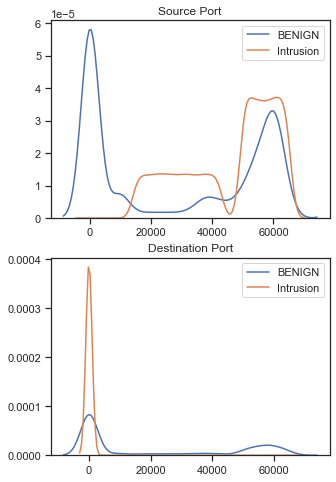

In [10]:
fig, axs = plt.subplots(figsize = (5,8), nrows=2, ncols=1)

sns.kdeplot(df.loc[df.Label == 0,'Source Port'], ax=axs[0], label='BENIGN')
sns.kdeplot(df.loc[df.Label == 1,'Source Port'], ax=axs[0], label='Intrusion')
axs[0].set_title('Source Port')

sns.kdeplot(df.loc[df.Label == 0,'Destination Port'], ax=axs[1], label='BENIGN')
sns.kdeplot(df.loc[df.Label == 1,'Destination Port'], bw=1000, ax=axs[1], label='Intrusion')
axs[1].set_title('Destination Port')

In [11]:
np.unique(df.loc[df.Label == 1,'Destination Port'], return_counts = True)

(array([   80, 27636, 64869, 64873], dtype=int64),
 array([128024,      1,      1,      1], dtype=int64))

So just by a quick density plot we see that many of the intrusions have source port numbers that are very high and most of the destination ports are `80` which makes sense as this is for `http`.  So it's open web.

I found a program that can search top scanned ports given 

https://securitytrails.com/blog/top-scanned-ports

Download here for Windows: https://nmap.org/download.html#windows 

You can run the command below:
`nmap --top-ports 20 X.X.X.X`
where `X.X.X.X` is the host or IP address.  I just used `local host`. 

I added the tools from Git Bash to my system path to perform the import from the command line as well.  We just need the return from between the two blank lines in the output with set `RS= ` for record separator to be blank lines and only return the `NR` number record to be 2 to get between the first and second blank line.

In [12]:
import os 
top = os.popen("nmap --top-ports 20 localhost | awk -v RS=  'NR==2{ print }' | awk '{print $1}'").read()

In [13]:
top = top.split("\n")

In [14]:
top_ports = [int(i.split("/")[0]) for i in top[1:-1]]
top_ports

[21,
 22,
 23,
 25,
 53,
 80,
 110,
 111,
 135,
 139,
 143,
 443,
 445,
 993,
 995,
 1723,
 3306,
 3389,
 5900,
 8080]

Keep only the top 20 ports and label the rest in `999999` for other ports.

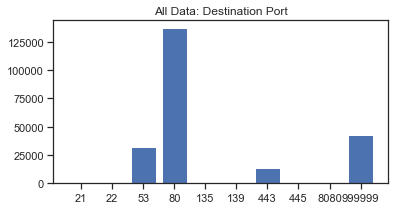

In [15]:
df['Destination Port'] =  np.where(df['Destination Port'].isin(top_ports), df['Destination Port'] , 999999)
counts = np.unique(df['Destination Port'], return_counts=True)
x_pos = np.arange(len(counts[0]))

plt.figure(figsize = (6,3))
plt.bar(x=x_pos, height=counts[1])
plt.xticks(x_pos, counts[0])
plt.title("All Data: Destination Port")
plt.show()

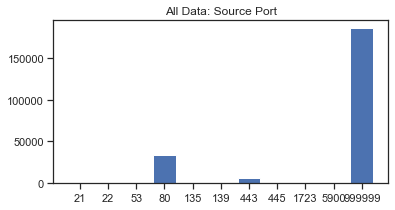

In [16]:
df['Source Port'] =  np.where(df['Source Port'].isin(top_ports), df['Source Port'] , 999999)
counts = np.unique(df['Source Port'], return_counts=True)
x_pos = np.arange(len(counts[0]))

plt.figure(figsize = (6,3))
plt.bar(x=x_pos, height=counts[1])
plt.xticks(x_pos, counts[0])
plt.title("All Data: Source Port")
plt.show()

__6. [10 pts] Display some histograms and anything you deem fit to pick independent Dataset 1 features. (Hint: source/destination bytes, packets, ports and the duration features)__

Let's now look at groups of data, i.e. select a few subsets of features based on feature type, with respect to the classification.  First I am going to clean up and convert the time to total minutes in the day and the IP address to integers using [ipaddress](https://docs.python.org/3/library/ipaddress.html).

In [17]:
df['Timestamp_new'] = pd.to_datetime(df.Timestamp).dt.hour*60 + pd.to_datetime(df.Timestamp).dt.minute

First plot densities for the IP addresses and the histograms above but now divided by Label.

In [18]:
import ipaddress

df['Source_IP_new'] = [int(ipaddress.IPv4Address(i)) for i in df['Source IP']]
df['Destination_IP_new'] = [int(ipaddress.IPv4Address(i)) for i in df['Destination IP']]

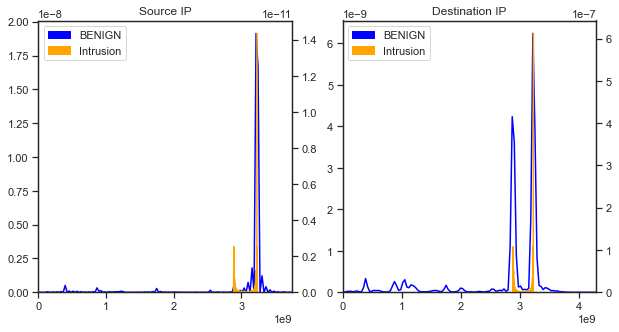

In [19]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(121)
sns.kdeplot(df.loc[df.Label == 0,'Source_IP_new'], ax=ax, color='blue')
ax.set_xlim(0, max(df['Source_IP_new']))
ax.set_title('Source IP')
ax1 = ax.twinx()
sns.kdeplot(df.loc[df.Label == 1,'Source_IP_new'], bw=10, ax=ax1, legend=None, color='orange')
blue_patch = mpatches.Patch(label='BENIGN', color='blue')
orange_patch = mpatches.Patch(label='Intrusion', color='orange')
ax.legend(handles=[blue_patch, orange_patch])

ax2 = fig.add_subplot(122)
sns.kdeplot(df.loc[df.Label == 0,'Destination_IP_new'], ax=ax2, color='blue')
ax2.set_xlim(0, max(df['Destination_IP_new']))
ax2.set_title('Destination IP')
ax3 = ax2.twinx()
sns.kdeplot(df.loc[df.Label == 1,'Destination_IP_new'], bw=10, ax=ax3, legend=None, color='orange')
blue_patch = mpatches.Patch(label='BENIGN', color='blue')
orange_patch = mpatches.Patch(label='Intrusion', color='orange')
ax2.legend(handles=[blue_patch, orange_patch])

plt.show()

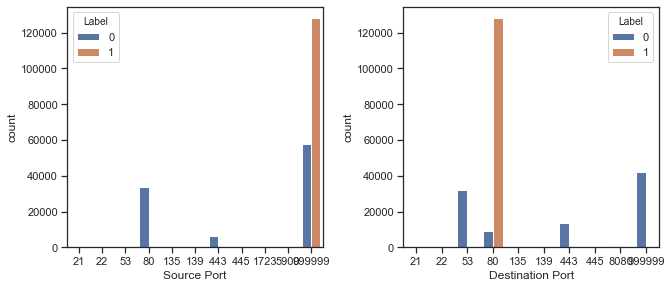

In [20]:
test = pd.concat([df['Source Port'], df['Label']], axis=1)

fig, axs = plt.subplots(figsize = (10,5), nrows=1, ncols=2)
fig.tight_layout(pad=4.0)
sns.countplot(x='Source Port', hue='Label', data=pd.concat([df['Source Port'], df['Label']], axis=1), ax=axs[0])
sns.countplot(x='Destination Port', hue='Label', data=pd.concat([df['Destination Port'], df['Label']], axis=1), ax=axs[1])

This just shows since we only kept the important ports that the source ports are destination ports were split across the important and other ports for the `BENIGN` class but were pretty biased for the `Intrusions` where the source ports were all under other ports category and the destination ports as indicated above were all under port `80`.

Now plot histograms for the Packets columns, then Bytes columns, then IAT columns, and finally the time columns.  We can do Protocol and Time of day as well since it does not take too long.

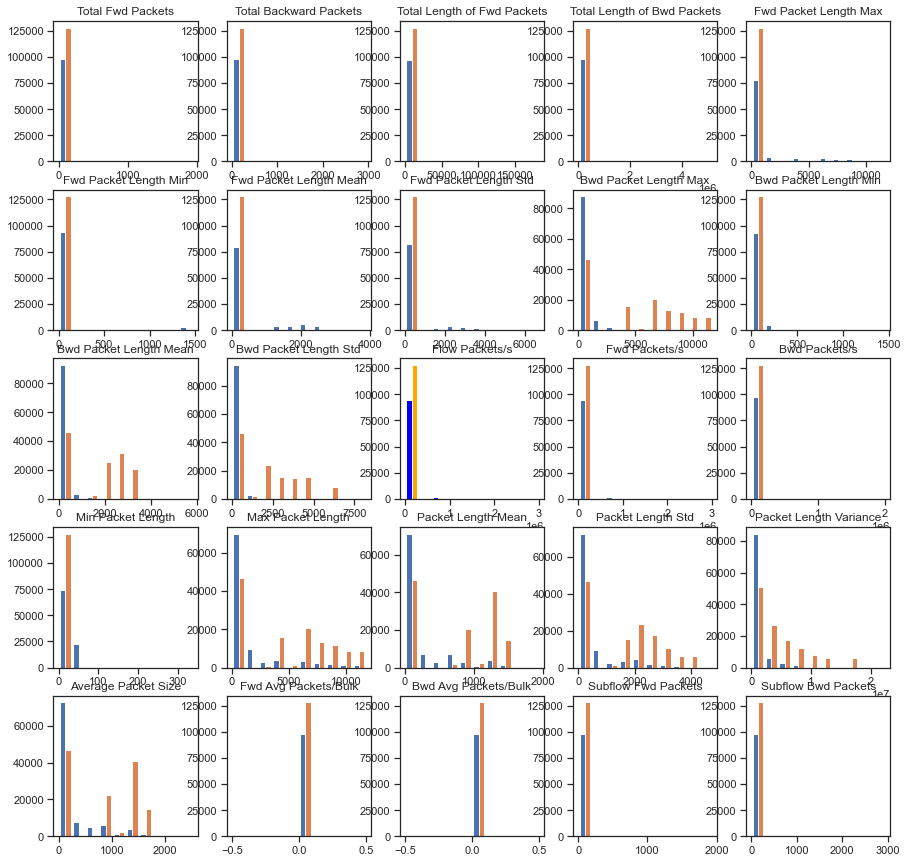

In [21]:
packet_df = pd.concat([df.filter(regex=".*Packet.*"), df.Label], axis=1)
labels = packet_df.Label.unique()

fig, axs = plt.subplots(figsize = (15,15), nrows=5, ncols=5)
i = 0
for j in range(5):
    for k in range(5):
        try:
            axs[j,k].hist([packet_df.loc[packet_df.Label == x, packet_df.columns[i]] for x in labels], label=labels)
        except ValueError:
            # remove inf and < 0
            temp = pd.concat([packet_df.iloc[:,i][packet_df.iloc[:,i].between(0, float('inf'), inclusive=False)], 
                              packet_df.Label], axis=1)
            axs[j,k].hist([temp.loc[temp.Label == x, temp.columns[0]] for x in labels], label=labels, color=['blue', 'orange'])
        axs[j, k].set_title(packet_df.columns[i])
        i += 1

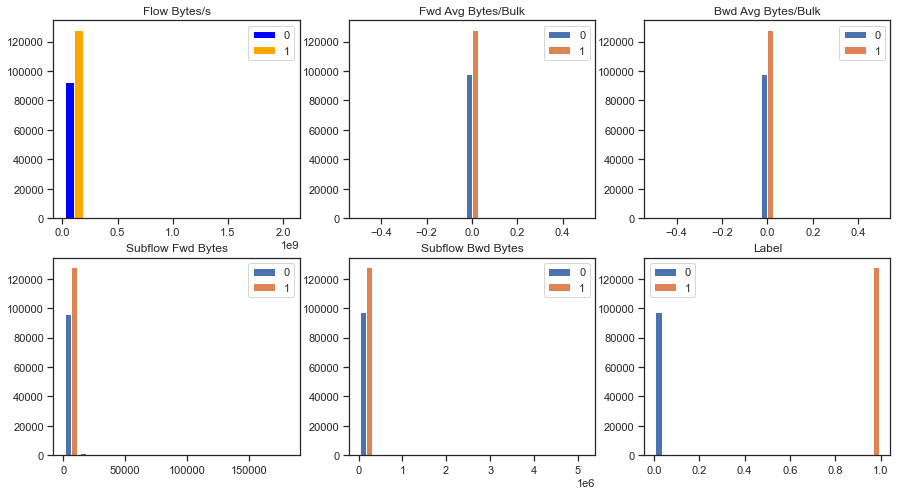

In [22]:
bytes_df = pd.concat([df.filter(regex=".*Bytes.*"), df.Label], axis=1)

fig, axs = plt.subplots(figsize = (15,8), nrows=2, ncols=3)
i = 0
for j in range(2):
    for k in range(3):
        try:
            axs[j,k].hist([bytes_df.loc[bytes_df.Label == x, bytes_df.columns[i]] for x in labels], label=labels,
                          bins=15)
        except ValueError:
            # remove inf and < 0
            temp = pd.concat([bytes_df.iloc[:,i][bytes_df.iloc[:,i].between(0, float('inf'), inclusive=False)], 
                              bytes_df.Label], axis=1)
            axs[j,k].hist([temp.loc[temp.Label == x, temp.columns[0]] for x in labels], label=labels, color=['blue',
                                                                                                             'orange'])
        finally:
            axs[j,k].legend()
        axs[j, k].set_title(bytes_df.columns[i])
        i += 1

In [23]:
IAT_df = pd.concat([df.filter(regex=".*IAT.*"), df.Label], axis=1)
len(IAT_df.columns)

15

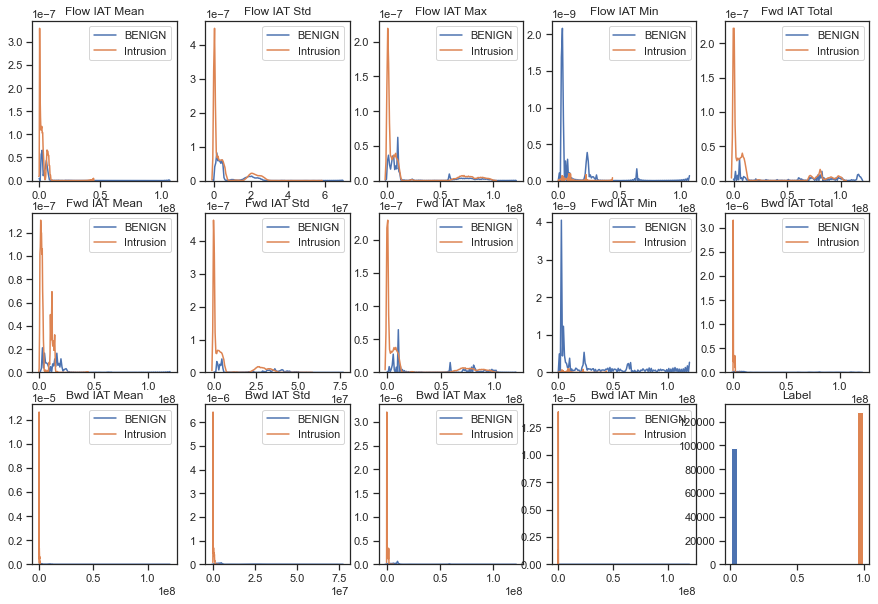

In [24]:
import warnings
warnings.filterwarnings('error')

IAT_df = pd.concat([df.filter(regex=".*IAT.*"), df.Label], axis=1)

fig, axs = plt.subplots(figsize = (15,10), nrows=3, ncols=5)
i = 0
for j in range(3):
    for k in range(5):
        try:
            sns.kdeplot(IAT_df.loc[IAT_df.Label == 0, IAT_df.columns[i]], ax=axs[j,k], label='BENIGN')
            sns.kdeplot(IAT_df.loc[IAT_df.Label == 1, IAT_df.columns[i]], ax=axs[j,k], label='Intrusion')
        except Warning:
            axs[j,k].hist([IAT_df.loc[IAT_df.Label == x, IAT_df.columns[i]] for x in labels], label=labels)  
        axs[j, k].set_title(IAT_df.columns[i])
        i += 1

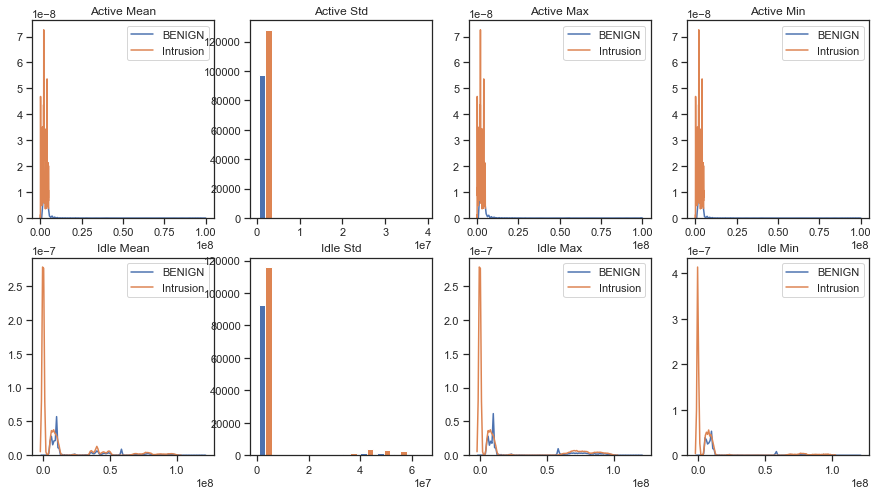

In [25]:
time_df = pd.concat([df.filter(regex=".*Active.*|^Idle"), df.Label], axis=1)

fig, axs = plt.subplots(figsize = (15, 8), nrows=2, ncols=4)
i = 0
for j in range(2):
    for k in range(4):
        try:
            sns.kdeplot(time_df.loc[time_df.Label == 0, time_df.columns[i]], ax=axs[j,k], label='BENIGN')
            sns.kdeplot(time_df.loc[IAT_df.Label == 1, time_df.columns[i]], ax=axs[j,k], label='Intrusion')
        except Warning:
            axs[j,k].hist([time_df.loc[IAT_df.Label == x, time_df.columns[i]] for x in labels], label=labels)  
        except RuntimeError:
            axs[j,k].hist([time_df.loc[IAT_df.Label == x, time_df.columns[i]] for x in labels], label=labels) 
        axs[j, k].set_title(time_df.columns[i])
        i += 1

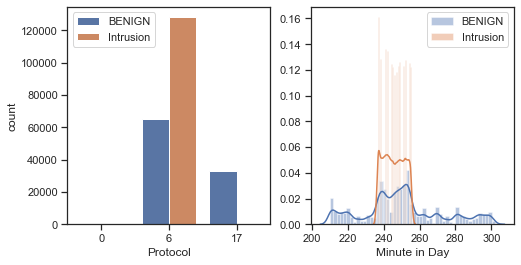

In [26]:
fig, axs = plt.subplots(figsize = (8,4), nrows=1, ncols=2)

sns.countplot(x='Protocol', hue='Label', data=pd.concat([df['Protocol'], df['Label']], axis=1), ax=axs[0])
labels = ['BENIGN', 'Intrusion']
h, l = axs[0].get_legend_handles_labels()
axs[0].legend(h, labels)
sns.distplot(df.loc[df.Label==0, 'Timestamp_new'], ax=axs[1], label='BENIGN')
sns.distplot(df.loc[df.Label==1, 'Timestamp_new'], ax=axs[1], label='Intrusion')
axs[1].set_xlabel('Minute in Day')
axs[1].legend()

__7. [10 pts] Attempt a few classifier models and report their 10-fold CV performance.__

First clean data.

In [27]:
col_rm = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
df_clean = df.drop(columns=col_rm)

In [28]:
df_clean_ohe = pd.get_dummies(df_clean, columns=['Source Port', 'Destination Port'], drop_first=True)

In [29]:
X = df_clean_ohe.loc[:, df_clean_ohe.columns != 'Label']
y = df_clean_ohe.loc[:, df_clean_ohe.columns == 'Label'].values.ravel()

In [30]:
# set infinity to max col values
infinity = X.columns.to_series()[np.isinf(X).any()]

for inf_col in infinity:
    max_ = X.loc[X[inf_col] != np.inf, inf_col].max()
    X.loc[:, inf_col].replace(np.inf, max_, inplace=True)

X.columns.to_series()[np.isinf(X).any()]

Series([], dtype: object)

In [31]:
null = X.columns[X.isnull().any()]

for n in null:
    X.loc[:, n] =  X.loc[:, n].fillna( X.loc[:, n].mean())
    
X.columns[X.isnull().any()]

Index([], dtype='object')

Try GradientBoost, RF, and Voting.  __Only doing 5-k fold as this the dataset is too large.__

In [32]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


kfold = KFold(n_splits=5, shuffle=True)

## run RandomForestRegressor pipe with small max_depth
Gradient_pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=0, max_features=5))
accuracies = cross_validate(Gradient_pipe, X, y, cv=kfold, scoring=['accuracy'])

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'GradientBoostingClassifier 5-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

GradientBoostingClassifier 5-fold cross validation test_accuracy is 1.000 ±0.0001


In [33]:
kfold = KFold(n_splits=5, shuffle=True)

## run RandomForestRegressor pipe with small max_depth
RFR_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, 
                                                                 max_depth=5, 
                                                                 random_state=0, 
                                                                 max_features=10, 
                                                                 n_jobs=-1))
accuracies = cross_validate(RFR_pipe, X, y, cv=kfold, scoring=['accuracy'])

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'RandomForestClassifier 5-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

RandomForestClassifier 5-fold cross validation test_accuracy is 0.999 ±0.0001


In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

kfold = KFold(n_splits=5, shuffle=True)

clf1 = LinearSVC(max_iter=100)
clf2 = GaussianNB()
clf3 = MLPClassifier(hidden_layer_sizes=(10,), random_state=1)

"""voting_clf = VotingClassifier(estimators=[('LinSVC', clf1),
                                          ('NB', clf2),
                                          ('ML', clf3)])"""
## removing LinSCV takes too long
voting_clf = VotingClassifier(estimators=[('NB', clf2),
                                          ('ML', clf3)])

VOTE_pipe = make_pipeline(StandardScaler(), voting_clf)

accuracies = cross_validate(VOTE_pipe, X, y, cv=kfold, scoring=['accuracy'])

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'VotingClassifier 5-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

VotingClassifier 5-fold cross validation test_accuracy is 0.999 ±0.0001


__8. [10 pts] Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8.__

In [35]:
import glob

files = glob.glob('GeneratedLabelledFlows/TrafficLabelling/*.csv')
files

['GeneratedLabelledFlows/TrafficLabelling\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Monday-WorkingHours.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Tuesday-WorkingHours.pcap_ISCX.csv',
 'GeneratedLabelledFlows/TrafficLabelling\\Wednesday-workingHours.pcap_ISCX.csv']

In [36]:
def read_preprocess(filename):
    try:
        df_ = pd.read_csv(filename)
    except:
        df_ = pd.read_csv(filename, encoding='latin1')
    df_.columns = df_.columns.str.lstrip()
    df_.Label = np.where(df_.Label == 'BENIGN', 0, 1)
    if len(df_.Label.unique()) < 2:
        print("Do DBCAN", filename) 
    df_.loc[:, 'Destination Port'] =  np.where(df_.loc[:, 'Destination Port'].isin(top_ports), df_.loc[:, 'Destination Port'] , 999999)
    df_.loc[:, 'Source Port'] =  np.where(df_.loc[:, 'Source Port'].isin(top_ports), df_.loc[:, 'Source Port'] , 999999)
    df_.loc[:, 'Timestamp_new'] = pd.to_datetime(df_.Timestamp).dt.hour*60 + pd.to_datetime(df_.Timestamp).dt.minute
    df_.loc[:, 'Source_IP_new'] = [int(ipaddress.IPv4Address(i)) for i in df_.loc[:, 'Source IP']]
    df_.loc[:, 'Destination_IP_new'] = [int(ipaddress.IPv4Address(i)) for i in df_.loc[:, 'Destination IP']]
    col_rm = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
    df_clean_ = df_.drop(columns=col_rm)
    df_clean_ohe_ = pd.get_dummies(df_clean_, columns=['Source Port', 'Destination Port'], drop_first=True)
    
    X_ = df_clean_ohe_.loc[:, df_clean_ohe_.columns != 'Label']
    y_ = df_clean_ohe_.loc[:, df_clean_ohe_.columns == 'Label'].values.ravel()
    
    infinity = X_.columns.to_series()[np.isinf(X_).any()]
    for inf_col in infinity:
        max_ = X_.loc[X_[inf_col] != np.inf, inf_col].max()
        X_.loc[:, inf_col].replace(np.inf, max_, inplace=True)
        
    null = X_.columns[X_.isnull().any()]
    for n in null:
        X_.loc[:, n] = X_.loc[:, n].fillna(X_.loc[:, n].mean()) 
        
    return X_, y_, len(df_.Label.unique())
    

__9. [10 pts] Pick a classifier and report it's evaluation for the remaining 7 datasets. Note that
one dataset has a single class, which might need an unsupervised learning.__

I found a [link](https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html) that said hdbscan is way faster to sklearn DBSCAN.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
import hdbscan ## https://hdbscan.readthedocs.io/en/latest/index.html
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [42]:
%%time
## just testing how long to take for RandomForest for one file for question 10
import warnings
warnings.filterwarnings('ignore')
X_, y_, length = read_preprocess(files[1])
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)
rf = RandomForestClassifier(max_depth=5, 
                            random_state=0, 
                            max_features=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = round(accuracy_score(y_pred, y_test), 3)
print(f'Score for file number {1+1}: {files[1]} is {score}.')
print(X_.shape)

Score for file number 2: GeneratedLabelledFlows/TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv is 0.999.
(286467, 117)
Wall time: 25 s


In [43]:
# Do GradientBoost for files with multiple classes and hdbscan for file with only 1 class.
for i, file_ in enumerate(files):
    X_, y_, length = read_preprocess(file_)

    if length > 1:
        X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=1)
        GB_clf = GradientBoostingClassifier(random_state=0, max_features=5)
        GB_clf.fit(X_train, y_train)
        y_pred = GB_clf.predict(X_test)
        score = round(accuracy_score(y_pred, y_test), 3)
        print(f'Score for file number {i+1}: {file_} is {score}.')
    else:
        hdb = hdbscan.HDBSCAN(min_cluster_size=10000, min_samples=1)
        ## only do to first 100,000 as this takes a while
        hdb.fit(X_[1:100000])
        clusters = np.unique(hdb.labels_, return_counts=True)

        for i in range(len(clusters[0])):
            if i == 0:
                pass
            else:
                print(f'Cluster {i}: {round(clusters[1][i]/sum(clusters[1])*100, 3)}%')


Score for file number 1: GeneratedLabelledFlows/TrafficLabelling\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv is 1.0.
Score for file number 2: GeneratedLabelledFlows/TrafficLabelling\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv is 1.0.
Score for file number 3: GeneratedLabelledFlows/TrafficLabelling\Friday-WorkingHours-Morning.pcap_ISCX.csv is 1.0.
Do DBCAN GeneratedLabelledFlows/TrafficLabelling\Monday-WorkingHours.pcap_ISCX.csv
Cluster 1: 55.719%
Cluster 2: 11.908%
Cluster 3: 11.762%
Score for file number 5: GeneratedLabelledFlows/TrafficLabelling\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv is 0.861.
Score for file number 6: GeneratedLabelledFlows/TrafficLabelling\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv is 1.0.
Score for file number 7: GeneratedLabelledFlows/TrafficLabelling\Tuesday-WorkingHours.pcap_ISCX.csv is 1.0.
Score for file number 8: GeneratedLabelledFlows/TrafficLabelling\Wednesday-workingHours.pcap_ISCX.csv is 1.0.


Results showed 100% for GradientBoosting for 6 of the 7 classifications, while `Thursday-WorkingHours-Afternoon-Infilteration` file only have 86% accurracy.  As for the unsupervised model using HDBSCAN algorithm we saw using only 100K samples and a min cluster size of 10K that there were three classes. I would think we need did further on what the classes represent and if the class with 55% is BENIGN.  Also there was about 21% outliers.

__10. [10 pts] Briefly write up your thoughts about developing a machine learning model where you are not a subject matter expert, such as, developing a cybersecurity intrusion detection pipeline as in this assignment.__

From my experience in how long a machine learning classifier can take run as most of these files had dimensions of over 100K by 100, it would be important to know which columns to keep and which ones are redundant.  Even with with 1/4th of these columns using an ensemble classifier that only uses 10 columns.features max, it still took 25 seconds for RandomForest and that was limiting to a depth of 5.  Not to mention the storage for all the columns.  I would also need to know how much data would be needed or the balance in how many BENIGN to Intrusions as well as the minimum total examples that we would need to train and test for.
